In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import os

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
coordinates = list(lat_lngs)

In [10]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-40.75329572051913 98.99005610360513
82.82368731868777 -142.98972835511495
-89.32547063030067 -105.5607378541494
85.47086432994809 79.97979542951907
-6.353094232406207 -119.24721915819603
67.25111785281604 79.26785389995604
49.37209742647474 -86.43672445736325
-83.6800630896933 -76.64763859053502
42.608064642272126 139.29807070106602
-42.71953634110909 -125.51813590188517
-8.558244694616178 -34.01197763062254
72.29074869484765 47.214165474469326
-54.34209332186772 84.73668933435783
-37.57339105902013 -104.67866030084288
-50.23517675456273 66.1617177860636
-24.607532452428003 1.7334797849514132
-47.23808499530205 -176.78941202346175
-53.28455943796514 99.41126881316546
-52.98676262016 59.49320620130098
-50.67050252212992 48.95960801266193
-84.6803340217756 -158.01859905344037
81.72499286642935 -44.180604820790876
-67.96668014077773 48.6955626878692
86.52423074496565 101.73491984077725
-53.91985840369748 -128.0266038103976
-76.9550318513639 94.64989984246785
-1.480677605100908 111.270260

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

255

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")


    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | tazovskiy
Processing Record 7 of Set 1 | longlac
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | iwanai
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | olinda
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | ilulissat
Processing Record

Processing Record 36 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | raton
Processing Record 39 of Set 4 | louis trichardt
Processing Record 40 of Set 4 | bereda
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | porto santo
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | jumla
Processing Record 45 of Set 4 | charters towers
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | stoyba
City not found. Skipping...
Processing Record 48 of Set 4 | linfen
Processing Record 49 of Set 4 | zhaozhou
Processing Record 50 of Set 4 | praia da vitoria
Processing Record 1 of Set 5 | zabid
Processing Record 2 of Set 5 | arlit
Processing Record 3 of Set 5 | tapaua
City not found. Skipping...
Processing Record 4 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 5 of Set 5 | riyadh
Processing Record 6 of Set 5 | jinxiang
Processing Record 7 of Set 5 | port

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,63.59,81,97,14.34,AU,2022-10-20 03:22:19
1,Aklavik,68.2191,-135.0107,25.97,93,100,5.73,CA,2022-10-20 03:22:19
2,Punta Arenas,-53.1500,-70.9167,37.51,75,0,18.41,CL,2022-10-20 03:22:20
3,Dikson,73.5069,80.5464,32.20,98,100,21.61,RU,2022-10-20 03:17:50
4,Atuona,-9.8000,-139.0333,77.20,72,2,13.11,PF,2022-10-20 03:21:19
5,Tazovskiy,67.4667,78.7000,35.15,97,100,16.15,RU,2022-10-20 03:22:20
6,Ushuaia,-54.8000,-68.3000,35.26,87,40,11.50,AR,2022-10-20 03:22:21
7,Iwanai,42.9744,140.5089,57.81,64,29,16.98,JP,2022-10-20 03:22:21
8,Rikitea,-23.1203,-134.9692,71.08,71,100,18.34,PF,2022-10-20 03:21:23
9,Olinda,-8.0089,-34.8553,78.53,69,75,9.22,BR,2022-10-20 03:22:21


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1666236503.6598778

In [16]:
cities_data = os.path.join('weather_data','cities.csv')
cities_data_df = pd.read_csv(cities_data)

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = cities_data_df["Lat"]
max_temps = cities_data_df["Max Temp"]
humidity = cities_data_df["Humidity"]
cloudiness = cities_data_df["Cloudiness"]
wind_speed = cities_data_df["Wind Speed"]

In [18]:
today = time.strftime("%x")
today

'10/19/22'

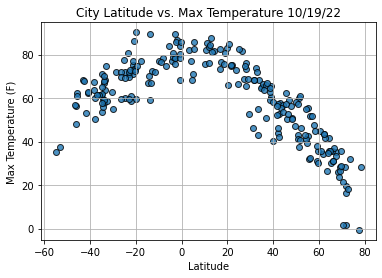

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

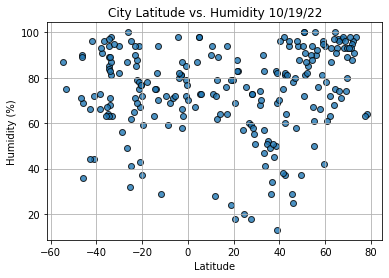

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

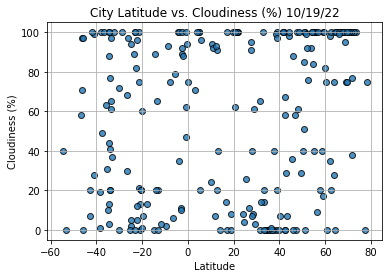

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

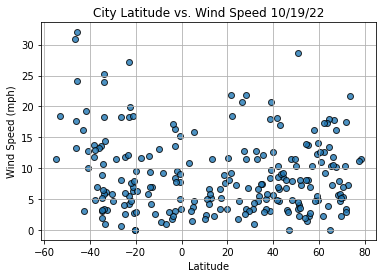

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [25]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [26]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

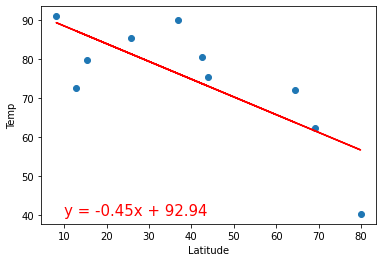

In [27]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Aklavik,68.2191,-135.0107,25.97,93,100,5.73,CA,2022-10-20 03:22:19
3,Dikson,73.5069,80.5464,32.20,98,100,21.61,RU,2022-10-20 03:17:50
5,Tazovskiy,67.4667,78.7000,35.15,97,100,16.15,RU,2022-10-20 03:22:20
7,Iwanai,42.9744,140.5089,57.81,64,29,16.98,JP,2022-10-20 03:22:21
12,Jamestown,42.0970,-79.2353,44.19,98,100,10.36,US,2022-10-20 03:22:15
...,...,...,...,...,...,...,...,...,...
220,Amalapuram,16.5833,82.0167,82.44,76,14,6.69,IN,2022-10-20 03:27:22
221,Husavik,66.0449,-17.3389,31.06,74,99,10.45,IS,2022-10-20 03:27:22
222,High Level,58.5169,-117.1360,44.71,81,40,4.61,CA,2022-10-20 03:27:23
223,Bardiyah,31.7561,25.0865,68.52,70,14,4.41,LY,2022-10-20 03:27:23


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Aklavik,68.2191,-135.0107,25.97,93,100,5.73,CA,2022-10-20 03:22:19
3,Dikson,73.5069,80.5464,32.20,98,100,21.61,RU,2022-10-20 03:17:50
5,Tazovskiy,67.4667,78.7000,35.15,97,100,16.15,RU,2022-10-20 03:22:20
7,Iwanai,42.9744,140.5089,57.81,64,29,16.98,JP,2022-10-20 03:22:21
12,Jamestown,42.0970,-79.2353,44.19,98,100,10.36,US,2022-10-20 03:22:15


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

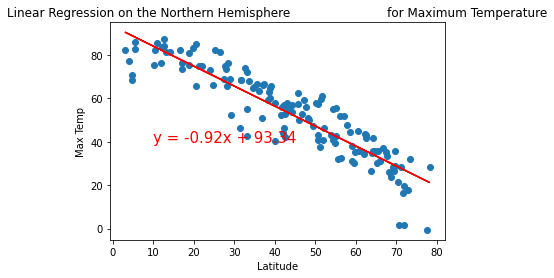

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

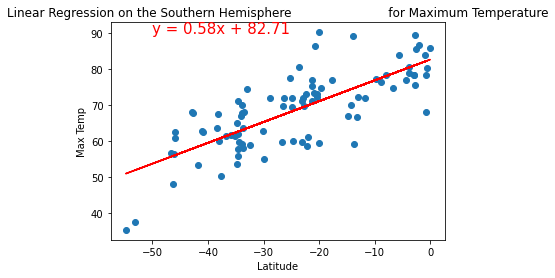

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

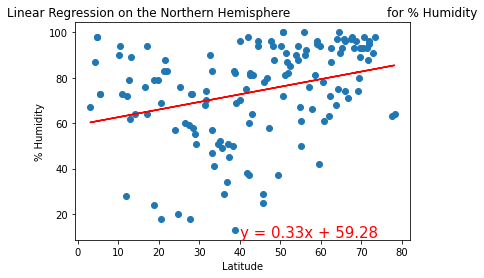

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

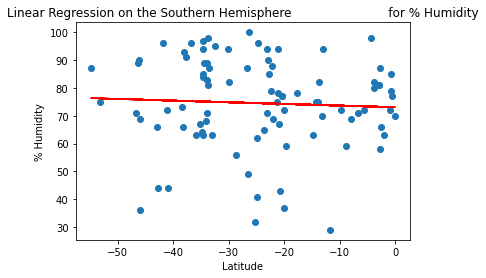

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

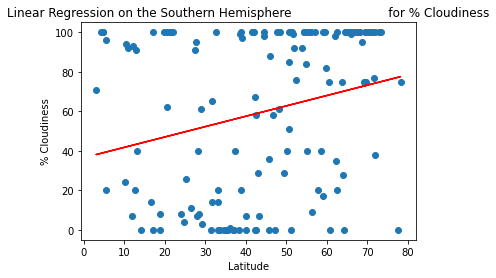

In [48]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,55))

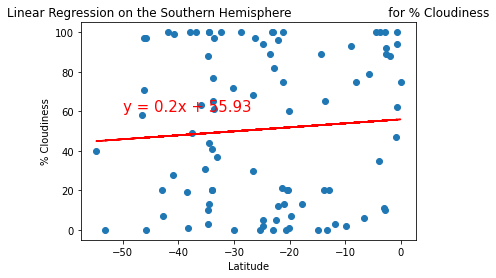

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

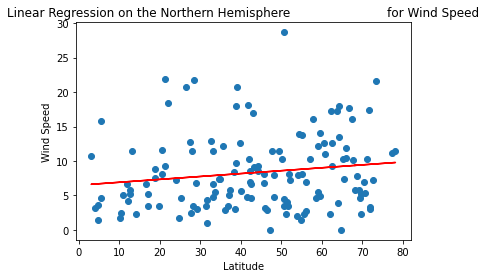

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

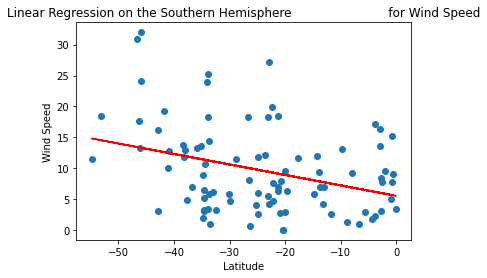

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))